# Exploratory Data Analysis

# Objectives
### After completing this lab you will be able to:
* Explore features or characteristics to predict price of car
* Analyze patterns and run descriptive statistical analysis
* Group data based on identified parameters and create pivot tables
* Identify the effect of independent attributes on price of cars

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

# Download the csv from server

In [4]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

response = requests.get(file_path)
with open('automobileEDA.csv','wb') as f:
    f.write(response.content)

# Make dataframe using pandas

In [11]:
df = pd.read_csv("automobileEDA.csv", header=0)

## How to choose the right visualization method?
* When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

## Question #1:¶
#### What is the data type of the column "peak-rpm"?

In [13]:
#Ans:
df["peak-rpm"].dtypes

dtype('float64')

## We can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [19]:
numeric_df = df.select_dtypes(include=["int64","float64"])
numeric_df.corr().head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356


# Question #2: 
### Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]

In [22]:
df[['bore','stroke','compression-ratio','horsepower']].corr().head(2)

,bore,stroke,compression-ratio,horsepower
bore,1.00000,-0.05539,0.001263,0.566936
stroke,-0.05539,1.00000,0.187923,0.098462


# Positive Linear Relationship
* Let's find the scatterplot of "engine-size" and "price".

<Axes: xlabel='engine-size', ylabel='price'>

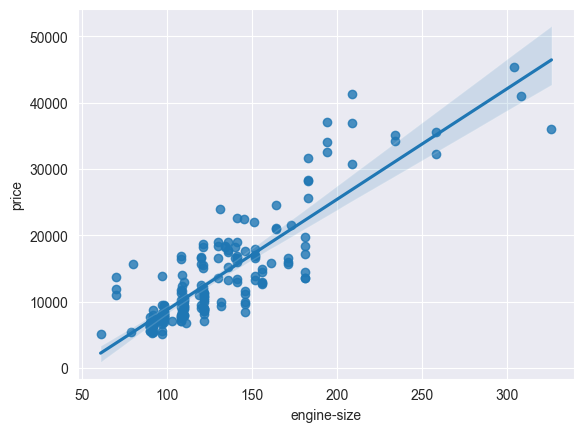

In [23]:
sns.regplot(x = "engine-size", y = "price", data = df)